# Bitcoin Net Worth Tracker
### This Jupyter notebook can be used to manually track your net worth in terms of bitcoin over time.<br><br>Update the values of your assets & liabilities below and run this notebook as frequently as you see fit.<br><br>Your data will be updated and stored locally in a CSV file and as a historic dashboard.<br>

## Update the BTC & USD Values of Your Assets & Liabilities
### After updating the values in the cell below, click on "Kernel" the menu bar and select "Restart & Run All".<br><br>Add or remove any assets & liabilities in the dictionaries below as needed.<br>

In [19]:
# ASSETS
# Assets that are denominated in terms of BTC
assets_btc = {
    "bitcoin": 1.00000000
}
# Other assets that are denominated in terms of USD
assets_usd = {
    "cash": 1000.00,
    "stocks": 2000.00,
    "car_value": 5000.00,
    "home_value": 250000.00
}

# LIABILITIES
# Liabilities that are denominated in terms of BTC
liabilities_btc = {}
# Other liabilities that are denominated in terms of USD
liabilities_usd = {
    "credit_card_debt": 2500.00,
    "student_loans": 10000.00,
    "car_loans": 4000.00,
    "mortgage": 220000.00,
}

## Get Bitcoin USD Exchange Rate from Kraken API &<br>Update Assets & Liabilities Dictionaries

In [20]:
import urllib
from datetime import datetime
import json
import numpy as np
np.seterr(divide="ignore")

now = datetime.now()
now_date = now.strftime("%m/%d/%Y %H:%M:%S")
df_date = now_date.split(' ')[0][:6]+now_date.split(' ')[0][8:]

URL = "https://api.kraken.com/0/public/Ticker?pair=USDCUSD,XBTUSDC"
with urllib.request.urlopen(URL) as url:
    data = json.loads(url.read().decode())
    usdcusd = float(data['result']['USDCUSD']['a'][0])
    btcusd = float(data['result']['XBTUSDC']['a'][0])/usdcusd
print(now)
print('USDBTC: %s BTC ($1 USD = %s sats)' % (format(1/btcusd, '.8f'), format(1/btcusd*100000000, ',.0f')))
print('BTCUSD: $%s' % format(btcusd, ',.2f'))

temp_assets_btc = assets_btc
temp_assets_usd = assets_usd
for a in list(temp_assets_btc.keys()):
    assets_usd[a] = temp_assets_btc[a] * btcusd
for a in list(temp_assets_usd.keys()):
    assets_btc[a] = temp_assets_usd[a] / btcusd

temp_liabilities_btc = liabilities_btc
temp_liabilities_usd = liabilities_usd
for l in list(temp_liabilities_btc.keys()):
    liabilities_usd[l] = temp_liabilities_btc[l] * btcusd
for l in list(temp_liabilities_usd.keys()):
    liabilities_btc[l] = temp_liabilities_usd[l] / btcusd

print()
str_btc = format(sum(assets_btc.values()), ',.8f')
str_usd = '$'+format(sum(assets_usd.values()), ',.2f')
print('Total Assets:      '+'{0:>13}'.format(str_btc)+' BTC ('+'{0:>11}'.format(str_usd)+')')
str_btc = format(sum(liabilities_btc.values()), ',.8f')
str_usd = '$'+format(sum(liabilities_usd.values()), ',.2f')
print('Total Liabilities: '+'{0:>13}'.format(str_btc)+' BTC ('+'{0:>11}'.format(str_usd)+')')
str_btc = format(abs(sum(assets_btc.values())-sum(liabilities_btc.values())), ',.8f')
str_usd = '$'+format(abs(sum(assets_usd.values())-sum(liabilities_usd.values())), ',.2f')
if sum(assets_btc.values()) > sum(liabilities_btc.values()):
    print('Total Net Worth:   '+'{0:>13}'.format(str_btc)+' BTC ('+'{0:>11}'.format(str_usd)+')')
else:
    print('Total Net Worth:  -'+'{0:>13}'.format(str_btc)+' BTC ('+'{0:>11}'.format(str_usd)+')')

2023-05-23 23:09:07.182515
USDBTC: 0.00003733 BTC ($1 USD = 3,733 sats)
BTCUSD: $26,785.57

Total Assets:        10.63205292 BTC ($284,785.57)
Total Liabilities:    8.82938185 BTC ($236,500.00)
Total Net Worth:      1.80267108 BTC ( $48,285.57)


In [21]:
import os
import pandas as pd

df_date = now_date.split(' ')[0][:6]+now_date.split(' ')[0][8:]
df_usd = float(format(sum(assets_usd.values())-sum(liabilities_usd.values()), '.2f'))
df_btc = float(format(sum(assets_btc.values())-sum(liabilities_btc.values()), '.8f'))
if not os.path.exists('./data/'):
    os.makedirs('./data/')
if not os.path.exists('./data/total_net_worth_usd_vs_btc.csv'):
    net_worth_df = pd.DataFrame([{'date': df_date, 'usd': df_usd, 'btc': df_btc}])
else:
    net_worth_df = pd.read_csv('./data/total_net_worth_usd_vs_btc.csv')
    if df_date in net_worth_df['date'].to_list():
        net_worth_df.loc[net_worth_df['date'] == df_date, 'usd'] = df_usd
        net_worth_df.loc[net_worth_df['date'] == df_date, 'btc'] = df_btc
    else:
        pd.concat([net_worth_df,pd.DataFrame([{'date': df_date, 'usd': df_usd, 'btc': df_btc}])])
    
orig_dates = net_worth_df['date'].to_list()
net_worth_usd = net_worth_df['usd'].to_list()
net_worth_btc = net_worth_df['btc'].to_list()

net_worth_df.to_csv('./data/total_net_worth_usd_vs_btc.csv', index=False)
net_worth_df.tail()

,date,usd,btc
0,05/23/23,48285.57,1.802671


## Create/Update/Save Historic Net Worth CSV

In [22]:
if os.path.exists('./data/historic_net_worth.csv'):
    historic_net_worth_df = pd.read_csv('./data/historic_net_worth.csv')
    if df_date in historic_net_worth_df['date'].to_list():
        historic_net_worth_df.loc[historic_net_worth_df['date'] == df_date, 'assets_btc'] = [assets_btc]
        historic_net_worth_df.loc[historic_net_worth_df['date'] == df_date, 'assets_usd'] = [assets_usd]
        historic_net_worth_df.loc[historic_net_worth_df['date'] == df_date, 'liabilities_btc'] = [liabilities_btc]
        historic_net_worth_df.loc[historic_net_worth_df['date'] == df_date, 'liabilities_usd'] = [liabilities_usd]
        historic_net_worth_df.loc[historic_net_worth_df['date'] == df_date, 'btcusd'] = btcusd
    else:
        pd.concat([historic_net_worth_df,pd.DataFrame([{'date': df_date,
                                                              'assets_btc': assets_btc,
                                                              'assets_usd': assets_usd,
                                                              'liabilities_btc': liabilities_btc,
                                                              'liabilities_usd': liabilities_usd,
                                                              'btcusd': btcusd}])])
    historic_net_worth_df.to_csv('./data/historic_net_worth.csv', index=False)
else:
    temp_df = pd.DataFrame()
    temp_df['date'] = [df_date]
    temp_df['assets_btc'] = [assets_btc]
    temp_df['assets_usd'] = [assets_usd]
    temp_df['liabilities_btc'] = [liabilities_btc]
    temp_df['liabilities_usd'] = [liabilities_usd]
    temp_df['btcusd'] = [btcusd]
    temp_df.to_csv('./data/historic_net_worth.csv', index=False)

historic_net_worth_df = pd.read_csv('./data/historic_net_worth.csv')

In [23]:
import matplotlib.dates as mdates

def str_to_datetime(strs):
    """Convert a list of "YYYY-MM-DD" strings to datetime objects."""
    dates = []
    for date in strs:
        if '-' in date:
            y, m, d = (int(x) for x in date.split("-"))
        elif '/' in date:
            m, d, y = int(date.split('/')[0]), int(date.split('/')[1]), \
                      int(date.split('/')[2])+2000
        date = datetime(y, m, d)
        dates.append(date)
    return dates

datetimes = str_to_datetime(orig_dates)
dates = [mdates.date2num(date) for date in datetimes]

def x_axis_dates(ax=None, fig=None):
    """Helper function to format the x axis as dates.

    Input:
    ax:  An Axes instance or an iterable of Axes instances.
    Optional, defaults to plt.gca()
    fig: The Figure instance containing those Axes or Axeses
    Optional, defaults to plt.gcf()
    """
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()

In [24]:
assets_list = []
for a in historic_net_worth_df['assets_btc'].to_list():
    try:
        for k in eval(a).keys():
            if k not in assets_list:
                assets_list.append(k)
    except:
        for k in a.keys():
            if k not in assets_list:
                assets_list.append(k)
assets_btc_dict = {a: [] for a in assets_list}

liabilities_list = []
for l in historic_net_worth_df['liabilities_btc'].to_list():
    try:
        for k in eval(l).keys():
            if k not in liabilities_list:
                liabilities_list.append(k)
    except:
        for k in l.keys():
            if k not in liabilities_list:
                liabilities_list.append(k)
liabilities_btc_dict = {l: [] for l in liabilities_list}

for a in historic_net_worth_df['assets_btc'].to_list():
    try:
        for a_check in assets_btc_dict.keys():
            if a_check in eval(a).keys():
                a_temp = assets_btc_dict[a_check]
                a_temp.append(eval(a)[a_check])
                assets_btc_dict[a_check] = a_temp
            else:
                a_temp = assets_btc_dict[a_check]
                a_temp.append(0)
                assets_btc_dict[a_check] = a_temp
    except:
        for a_check in assets_btc_dict.keys():
            if a_check in a.keys():
                a_temp = assets_btc_dict[a_check]
                a_temp.append(a[a_check])
                assets_btc_dict[a_check] = a_temp
            else:
                a_temp = assets_btc_dict[a_check]
                a_temp.append(0)
                assets_btc_dict[a_check] = a_temp

for l in historic_net_worth_df['liabilities_btc'].to_list():
    try:
        for l_check in liabilities_btc_dict.keys():
            if l_check in eval(l).keys():
                l_temp = liabilities_btc_dict[l_check]
                l_temp.append(eval(l)[l_check])
                liabilities_btc_dict[l_check] = l_temp
            else:
                l_temp = liabilities_btc_dict[l_check]
                l_temp.append(0)
                liabilities_btc_dict[l_check] = l_temp
    except:
        for l_check in liabilities_btc_dict.keys():
            if l_check in l.keys():
                l_temp = liabilities_btc_dict[l_check]
                l_temp.append(l[l_check])
                liabilities_btc_dict[l_check] = l_temp
            else:
                l_temp = liabilities_btc_dict[l_check]
                l_temp.append(0)
                liabilities_btc_dict[l_check] = l_temp

al_btc_df = pd.DataFrame(columns=[assets_list+liabilities_list])
for a_check in assets_btc_dict.keys():
    al_btc_df[a_check] = assets_btc_dict[a_check]
for l_check in liabilities_btc_dict.keys():
    al_btc_df[l_check] = liabilities_btc_dict[l_check]

al_btc_df['date'] = historic_net_worth_df['date']
al_datetimes = str_to_datetime(historic_net_worth_df['date'].to_list())
al_dates = [mdates.date2num(date) for date in al_datetimes]
al_btc_df['plot_date'] = al_dates
al_btc_df.tail()

,bitcoin,cash,stocks,car_value,home_value,credit_card_debt,student_loans,car_loans,mortgage,date,plot_date
0,1.0,0.037334,0.074667,0.186668,9.333385,0.093334,0.373335,0.149334,8.213378,05/23/23,19500.0


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
##Uncomment to see different color selections
# plot_color_gradients('Qualitative',
#                      ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
#                       'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
#                       'tab20c'])
# plot_color_gradients('Miscellaneous',
#                      ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
#                       'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
#                       'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
#                       'turbo', 'nipy_spectral', 'gist_ncar'])

# plt.show()

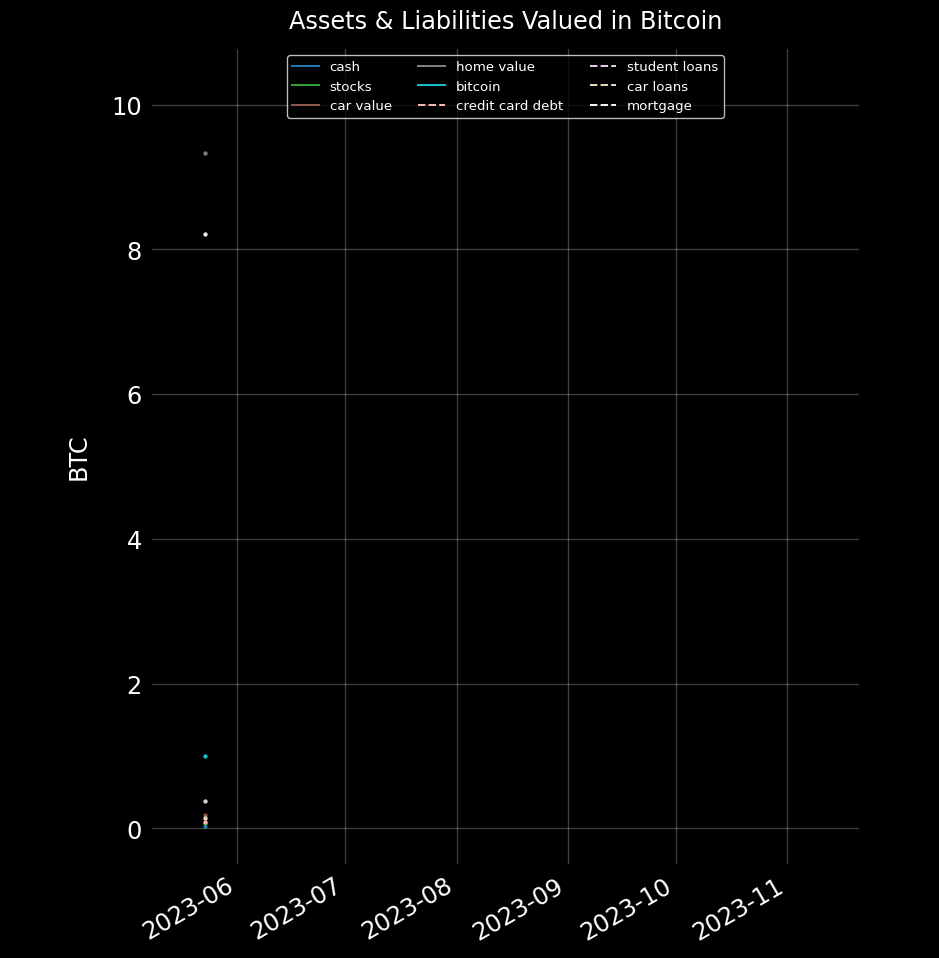

In [26]:
import matplotlib.pyplot as plt

res = (1920/2., 1920/2.)
size = res[0]/96.
size_y = res[1]/96.

fig, ax = plt.subplots(figsize=(size, size_y), dpi=96)
fig.patch.set_facecolor('black')

assets_plot_list = list(assets_usd.keys()) # assets_plot_list = ['bitcoin', 'home_value', 'car_value', 'cash', 'stocks']
asset_color_map = mpl.colormaps['tab10'].resampled(len(assets_plot_list)) # assets_plot_colors = ['#ff9900', '#2665bd', 'gray', '#118C4F', '#CC8899']
assets_plot_colors = asset_color_map.colors

for i in range(len(assets_plot_list)):
    a = assets_plot_list[i]
    py = [float(v) for v in list(al_btc_df[a].values)]
    py_good = []
    dates_good = []
    for j in range(len(py)):
        if py[j] > 0:
            py_good.append(py[j])
            dates_good.append(al_dates[j])
    if len(dates_good) == 1:
        ax.scatter(dates_good, py_good, color=assets_plot_colors[i], s=5)
    ax.plot(dates_good, py_good, label=a.replace('_', ' '), color=assets_plot_colors[i])

liabilities_plot_list = list(liabilities_usd.keys())
liabilities_color_map = mpl.colormaps['Pastel1'].resampled(len(liabilities_plot_list))
liabilities_plot_colors = liabilities_color_map.colors

for i in range(len(liabilities_plot_list)):
    l = liabilities_plot_list[i]
    py = [float(v) for v in list(al_btc_df[l].values)]
    py_good = []
    dates_good = []
    for j in range(len(py)):
        if py[j] > 0:
            py_good.append(py[j])
            dates_good.append(al_dates[j])
    if len(dates_good) == 1:
        ax.scatter(dates_good, py_good, s=5, color=liabilities_plot_colors[i])
    ax.plot(dates_good, py_good, label=l.replace('_', ' '), linestyle='--',
            color=liabilities_plot_colors[i])

ax.grid(color='w', alpha=0.25, linewidth=1, axis='both')
ax.set_xlim(min(al_dates)-15, max(al_dates)+max(15, 182-(max(al_dates)-min(al_dates))))
ax.set_ylim(ax.get_ylim()[1]*-0.05, ax.get_ylim()[1]*1.1)
ax.patch.set_visible(False)

plt.yticks(color='w', fontsize=18)
plt.xticks(color='w', fontsize=18)
x_axis_dates()

legend = ax.legend(loc='upper center', ncol=3, facecolor='black', framealpha=0.75)
for text in legend.get_texts():
    text.set_color('w')
frame = legend.get_frame()
frame.set_edgecolor('w')
ax.set_ylabel('BTC', fontsize=18, labelpad=15, color='w')
plt.text(0.5, 1.025, 'Assets & Liabilities Valued in Bitcoin',
         fontsize=18, zorder=100, horizontalalignment='center', color='w', transform=ax.transAxes)
plt.text(-0.2, -0.1, 'test', color='black', transform=ax.transAxes)
plt.text(1.1, 0.5, 'test', color='black', ha='right', va='bottom', transform=ax.transAxes)
plt.tight_layout()
fig.savefig('./data/bitcoin_denominated_assets_and_liabilities.png')

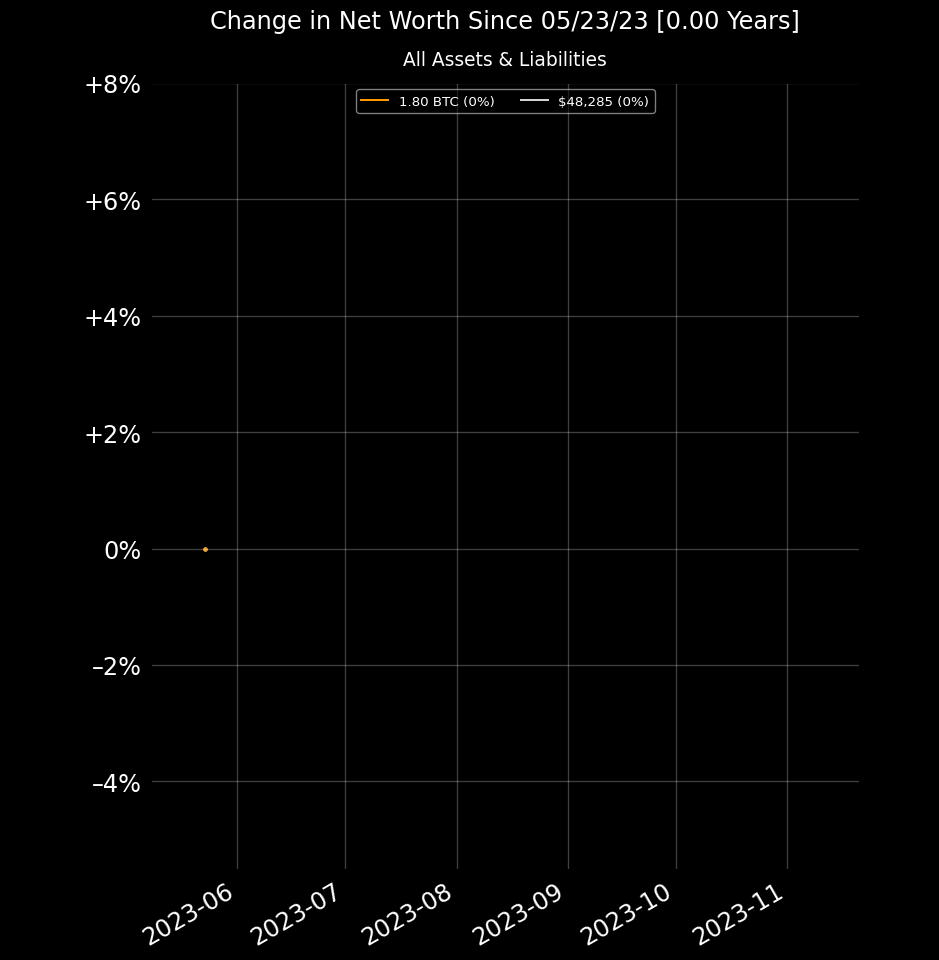

In [27]:
total_net_worth_usd = net_worth_df['usd'].to_list()
total_net_worth_btc = net_worth_df['btc'].to_list()

res = (1920/2., 1920/2.)
size = res[0]/96.
size_y = res[1]/96.

fig, ax = plt.subplots(figsize=(size, size_y), dpi=96)
fig.patch.set_facecolor('black')

btc_price_i = total_net_worth_btc[0]
usd_price_i = total_net_worth_usd[0]
if len(total_net_worth_usd) > 1:
    if (total_net_worth_usd[-1]-total_net_worth_usd[0]) > 0:
        usd_label = '$%s (+%.1f%%)' % \
        (format(int(total_net_worth_usd[-1]), ',d'),
         abs(total_net_worth_usd[-1]-total_net_worth_usd[0])/total_net_worth_usd[0]*100)
    else:
        usd_label = '$%s (-%.1f%%)' % \
        (format(int(total_net_worth_usd[-1]), ',d'),
         abs(total_net_worth_usd[-1]-total_net_worth_usd[0])/total_net_worth_usd[0]*100)
else:
    usd_label = '$%s (0%%)' % format(int(total_net_worth_usd[-1]), ',d')
    ax.scatter(dates, [(p-usd_price_i)/usd_price_i for p in total_net_worth_usd], color="lightgray", s=5)
ax.plot(dates, [(p-usd_price_i)/usd_price_i for p in total_net_worth_usd], color="lightgray",
        label=usd_label)
if len(total_net_worth_btc) > 1:
    if (total_net_worth_btc[-1]-total_net_worth_btc[0]) > 0:
        btc_label = '%.2f BTC (+%.1f%%)' % \
        (total_net_worth_btc[-1], abs(total_net_worth_btc[-1]-total_net_worth_btc[0])/total_net_worth_btc[0]*100)
    else:
        btc_label = '%.2f BTC (-%.1f%%)' % \
        (total_net_worth_btc[-1], abs(total_net_worth_btc[-1]-total_net_worth_btc[0])/total_net_worth_btc[0]*100)
else:
    btc_label = '%.2f BTC (0%%)' % total_net_worth_btc[-1]
    ax.scatter(dates, [(p-btc_price_i)/btc_price_i for p in total_net_worth_btc], color="#FF9900", s=5)
ax.plot(dates, [(p-btc_price_i)/btc_price_i for p in total_net_worth_btc], color="#FF9900", 
        label=btc_label)

ax_ymin = min(-0.05, ax.get_ylim()[0])
ax_ymax = max(0.05, ax.get_ylim()[1])
ax.set_ylim(ax_ymin, ax_ymax*1.1)
labels = ["+%i%%" % int(np.round(item*100)) if item>=0 else "–%i%%" %
          int(abs(np.round(item*100))) for item in ax.get_yticks()[1:]]
labels = [l if l != "+0%" else "0%" for l in labels]
plt.yticks([item for item in ax.get_yticks()[1:]], labels, color='w', fontsize=18)

plt.text(0.5, 1.07, 'Change in Net Worth Since %s [%.2f Years]' %
         (net_worth_df['date'].iloc[0], (max(dates)-min(dates)+1)/365.25),
         fontsize=18, zorder=100, horizontalalignment='center', color='w', transform=ax.transAxes)
plt.text(0.5, 1.022, 'All Assets & Liabilities',
         fontsize=14, zorder=100, horizontalalignment='center', color='w', transform=ax.transAxes)

ax.grid(color='w', alpha=0.25, linewidth=1, axis='both')
ax.set_xlim(min(dates)-15, max(dates)+max(15, 182-(max(dates)-min(dates))))
ax.patch.set_visible(False)

x_axis_dates()
plt.xticks(color='w', fontsize=18)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[::-1], labels[::-1], loc='upper center', ncol=2, facecolor='black', framealpha=0.5)
for text in legend.get_texts():
    text.set_color('w')
frame = legend.get_frame()
frame.set_edgecolor('w')
plt.text(1.1, 0.5, 'test', color='black', ha='right', va='bottom', transform=ax.transAxes)
plt.text(-0.2, -0.1, 'test', color='black', transform=ax.transAxes)
plt.tight_layout()
fig.savefig('./data/change_in_net_worth.png')

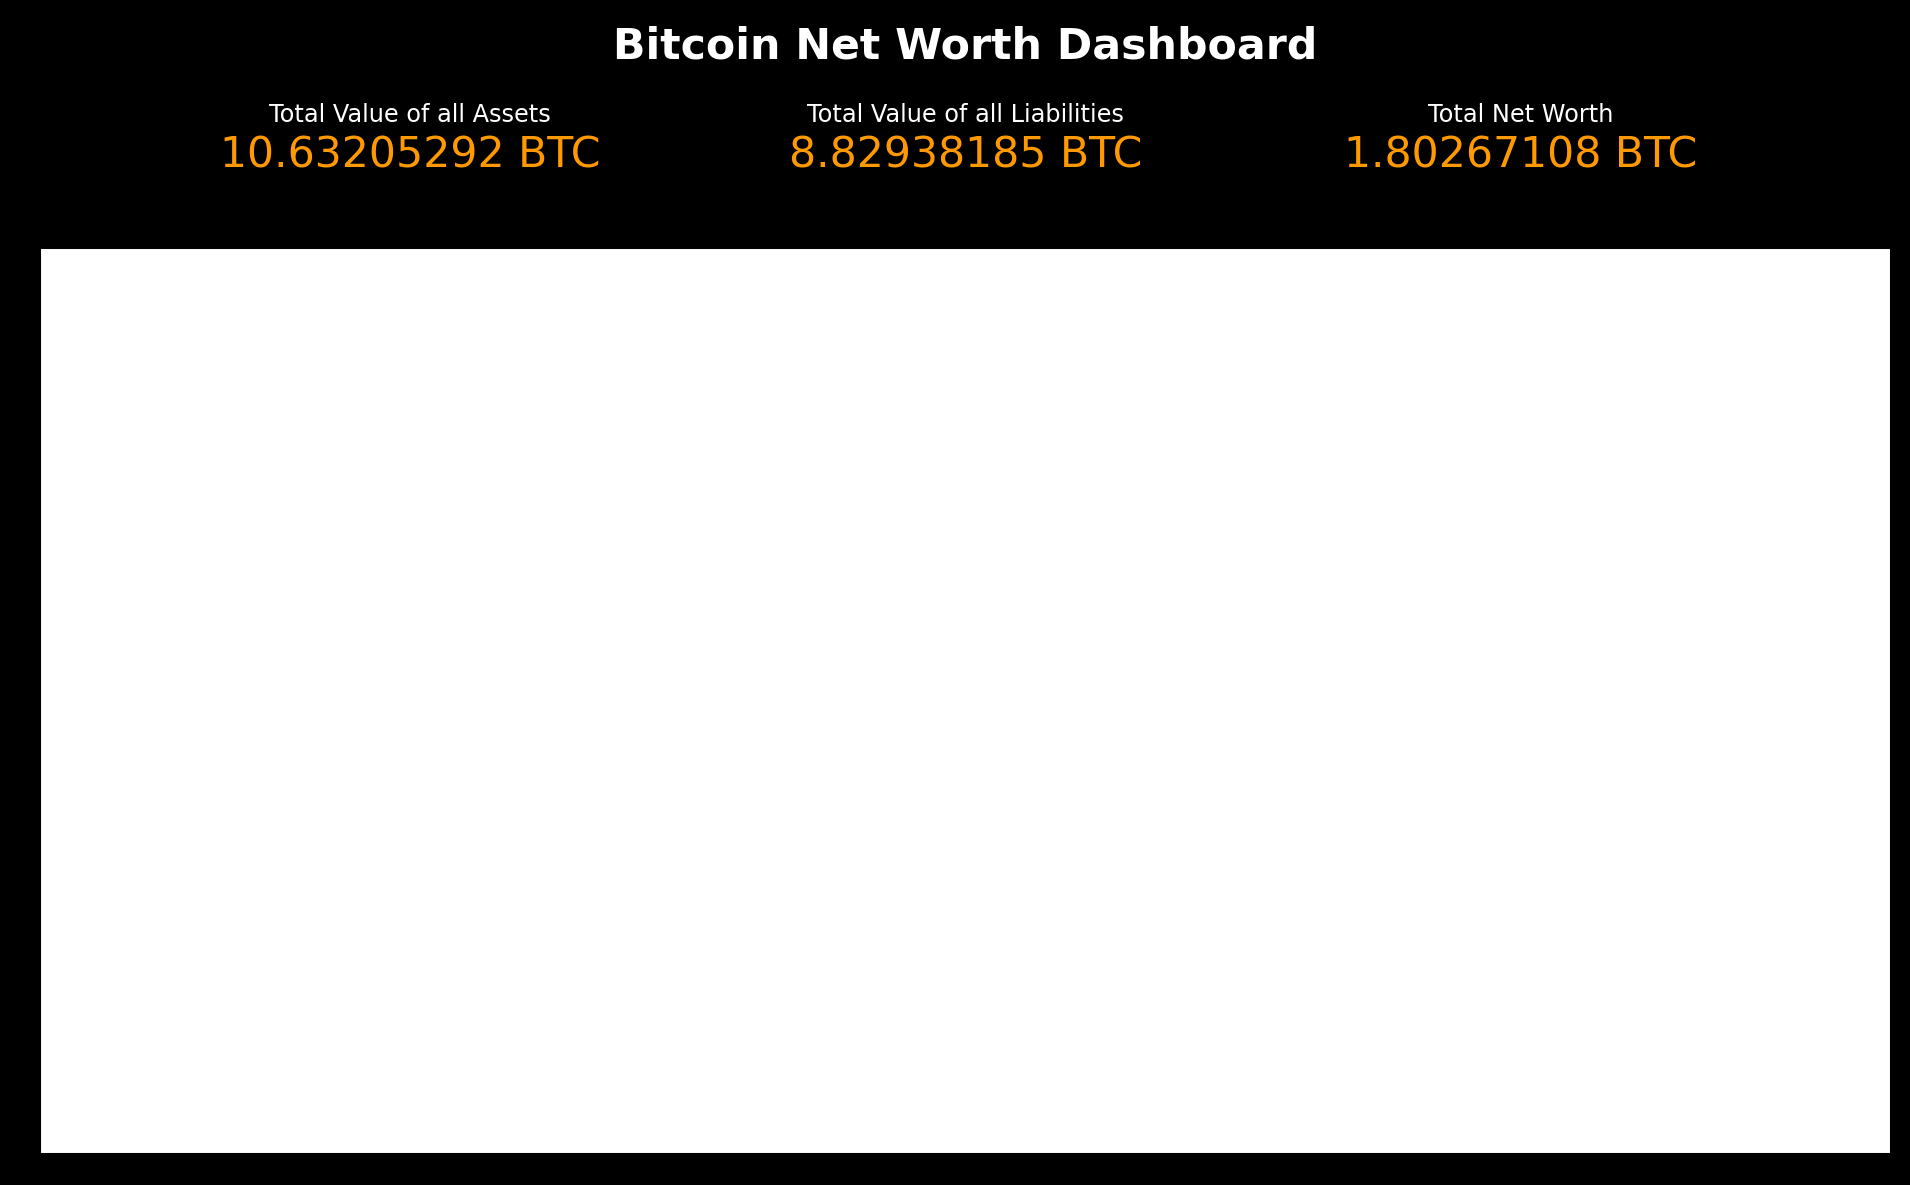

In [28]:
from PIL import Image, ImageDraw, ImageFilter

res = (1920, 1200)
size = res[0]/96.
size_y = res[1]/96.

fig, ax = plt.subplots(figsize=(size, size_y), dpi=96, facecolor='black')
fig.patch.set_facecolor('black')

plt.text(0.5, 1.21, 'Bitcoin Net Worth Dashboard',
         fontsize=32, zorder=100, ha='center', color='w', transform=ax.transAxes, fontweight='bold')
plt.text(0.2, 1.14, 'Total Value of all Assets',
         fontsize=18, zorder=100, ha='center', color='w', transform=ax.transAxes)
plt.text(0.2, 1.09, '%.8f BTC' % sum(assets_btc.values()),
         fontsize=32, zorder=100, ha='center', color='#ff9900', transform=ax.transAxes)
plt.text(0.5, 1.14, 'Total Value of all Liabilities',
         fontsize=18, zorder=100, ha='center', color='w', transform=ax.transAxes)
plt.text(0.5, 1.09, '%.8f BTC' % sum(liabilities_btc.values()),
         fontsize=32, zorder=100, ha='center', color='#ff9900', transform=ax.transAxes)
plt.text(0.8, 1.14, 'Total Net Worth',
         fontsize=18, zorder=100, ha='center', color='w', transform=ax.transAxes)
plt.text(0.8, 1.09, '%.8f BTC' % (sum(assets_btc.values())-sum(liabilities_btc.values())),
         fontsize=32, zorder=100, ha='center', color='#ff9900', transform=ax.transAxes)
plt.text(0, 1.25, 'test', color='black', ha='right', va='bottom', transform=ax.transAxes)

plt.tight_layout()
fig.savefig('bitcoin_net_worth_dashboard.png')

im1 = Image.open('bitcoin_net_worth_dashboard.png')
back_im = im1.copy()

im1 = Image.open('./data/bitcoin_denominated_assets_and_liabilities.png')
back_im.paste(im1, (0, 210), im1.convert('RGBA'))
im2 = Image.open('./data/change_in_net_worth.png')
back_im.paste(im2, (960, 210), im2.convert('RGBA'))
back_im.save('bitcoin_net_worth_dashboard.png', quality=100)